<a href="https://colab.research.google.com/github/research-breakdown/research.breakdown/blob/main/Synapse_GoldenRatio_in_Hexagon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
# Manim version 0.17.3 was used when project was created
!pip install manim
# Python version 3.10.11 was used when project was created
!pip install IPython --upgrade

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,606 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,047 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.9/808.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.19.0 which is incompatible.


In [ ]:
from manim import *

Manim Community v0.18.0

[01/08/24 04:34:37] INFO                                                                   ]8;id=206702;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=33003;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             '/content/media/images/content/scene_2_ManimCE_v0.18.0.png'                           
                                                                                                                   

INFO:manim:
File ready at '/content/media/images/content/scene_2_ManimCE_v0.18.0.png'



                    INFO     Rendered scene_2                                                          ]8;id=803096;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=172419;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 0 animations                                                                   

INFO:manim:Rendered scene_2
Played 0 animations


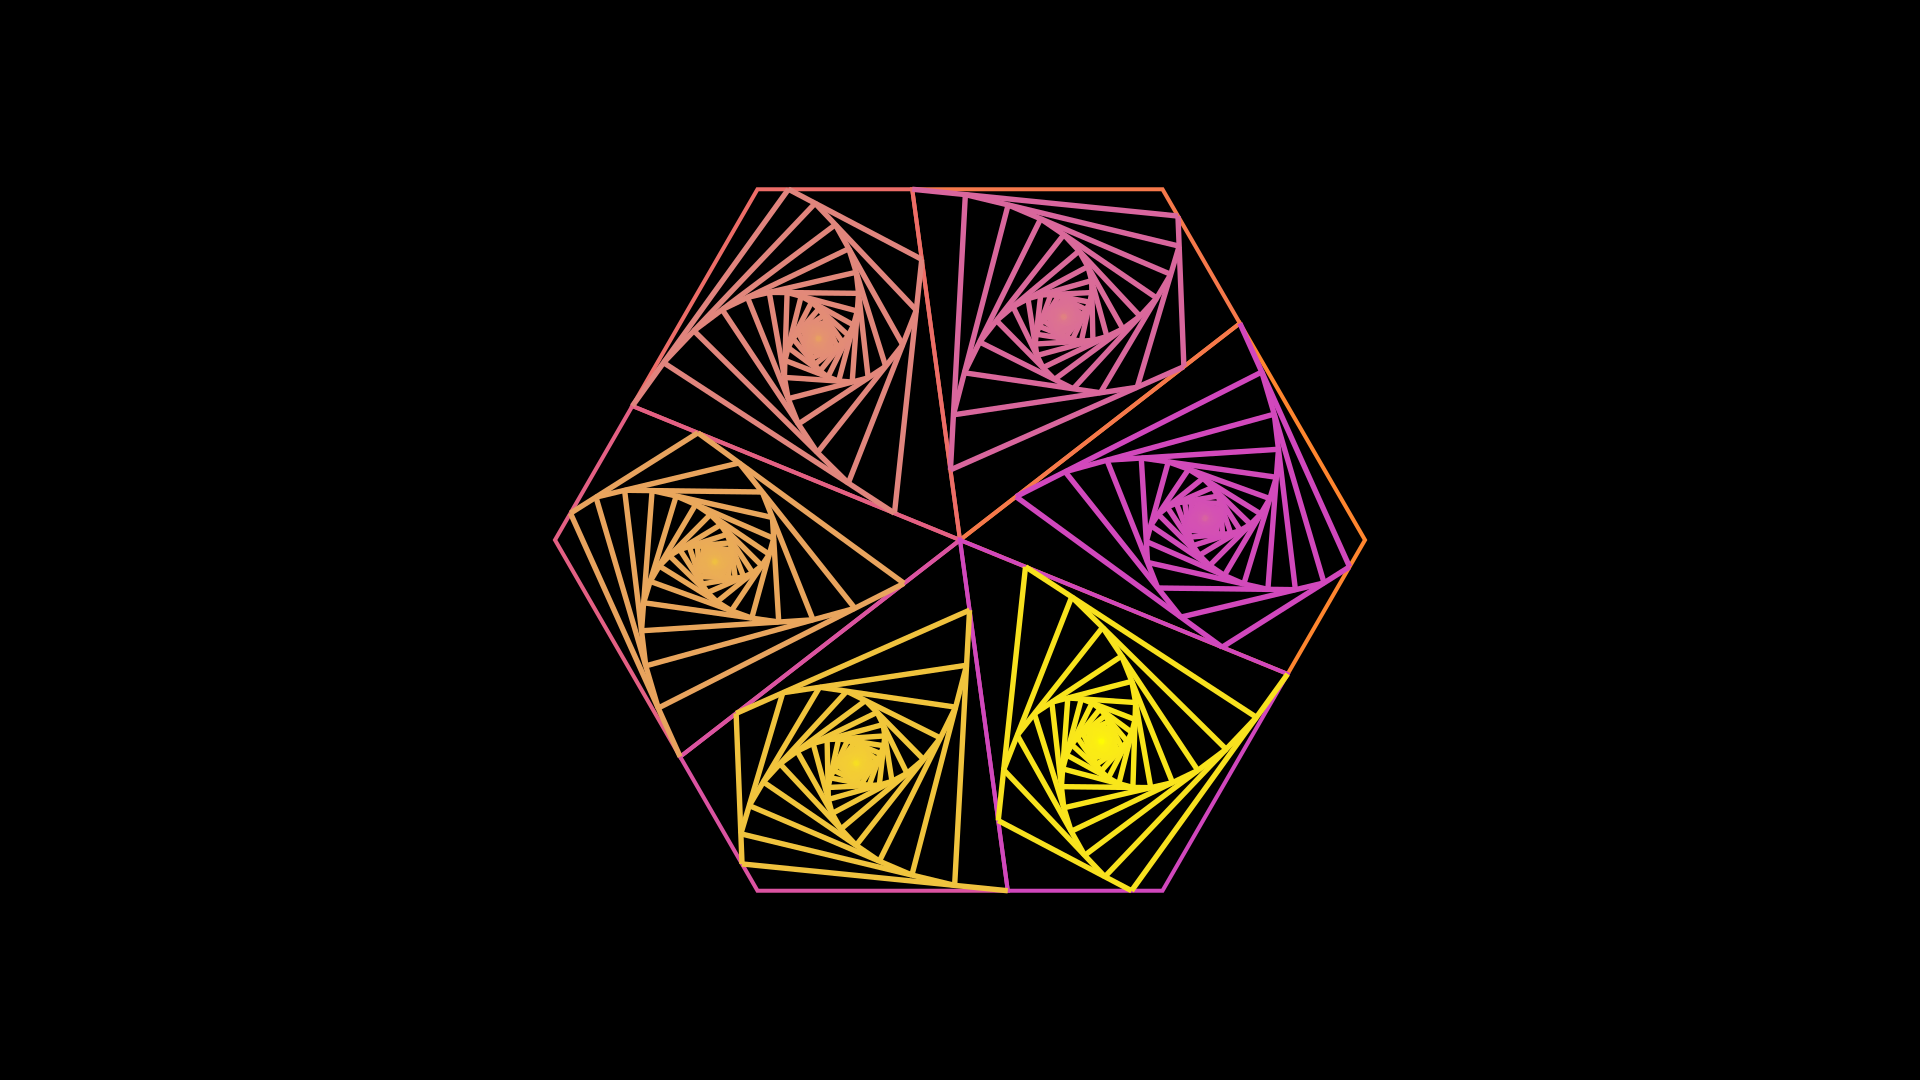

In [40]:
%%manim scene_2

class SpiralPolygon(VGroup):
  def __init__(self, p:RegularPolygon, n=150, prop=0.2, **kwargs):
    super().__init__(**kwargs)
    vertices = p.get_vertices()
    n_vertices = len(vertices)
    lines = [
        Line(vertices[i], vertices[(i+1)%n_vertices])
        for i in range(n_vertices)
    ]
    tmp_lines = lines[1:]
    for _ in range(n):
      last_line = tmp_lines[-1]
      first_line = tmp_lines[0]
      next_line = Line(
          last_line.get_end(),
          first_line.point_from_proportion(prop)
    )
      tmp_lines.pop(0)
      tmp_lines.append(next_line)
      self.add(next_line)

class scene_2(Scene):
  def construct(self):

    p = RegularPolygon(6).scale(3)
    c = p.get_center()
    vertices = p.get_vertices()
    n_vertices = len(vertices)

    lines = [
        Line(vertices[i], vertices[(i+1)%n_vertices])
        for i in range(n_vertices)
    ]
    mid_vertices = [l.point_from_proportion(0.618) for l in lines]
    grp = VGroup(*[
        Polygon(
            mid_vertices[i], vertices[i], mid_vertices[i-1], c
        )
        for i in range(n_vertices)
    ]).set_stroke(width=3).set_color_by_gradient(ORANGE, PINK)
    s_grp = VGroup(*[
        SpiralPolygon(_p)
        for _p in grp
    ]).set_color_by_gradient(PINK, YELLOW)
#-----------------------------------------------------------------------------#

    # final = VGroup(grp, s_grp) #suspend this line to view animated version
    # self.add(final) #suspend this line to view animated version
    self.play(Create(grp), Create(s_grp), run_time=5) #UNsuspend this line to view animated version
    self.wait(2)
